# The Forbidden Peace
Over the last five centuries, wars between Great Powers have become less frequent([Levy](https://www.jstor.org/stable/2600652?seq=1)) with a reduction of both years of war (Fig. 1 right) and of the number of contemporary wars (Fig. 1 left).  A gradual emergence of concepts like *total war* and then *long peace* characterized the time slot from the end of WWII until our days. Over the last 75 years, the death rate from conflicts between states has fallen to almost zero and combatants from Great Power nations have come into direct conflict only once([Cashman](https://assets.ctfassets.net/x5sq5djrgbwu/1cT1AsYCIomlUhOque0JgW/74ffb0b1a4803e1f9654e86e2c7f3af1/Great_Power_Conflict_report_-_Founders_Pledge.pdf)). 

Several attempts to explain the long peace have been given in the past ([Pinker](https://stevenpinker.com/publications/better-angels-our-nature)): first, that long peace is a "nuclear peace". This is a direct consequence of the fear related to the ultimate destructive power of a nuclear war which could undermine the continuity itself of human being existence. Second, the long peace as a spreading of democracy all around the world. Third, the spread of political and economic freedom, as well as international trade, encourages peace. Fourth, the long peace as the result of changing international norms to punish
conflict and encourage cooperation: such a process, sparked by the proliferation of intergovernmental organizations and attendant increase in flows of people, money, goods, and ideas, could be making the idea of going to war “inherently immoral”. Overall, none of the four theories Pinker suggests may be strong enough to explain the Long Peace on its own. It does seem likely that all four factors have contributed to making peace more common. Maybe have not.

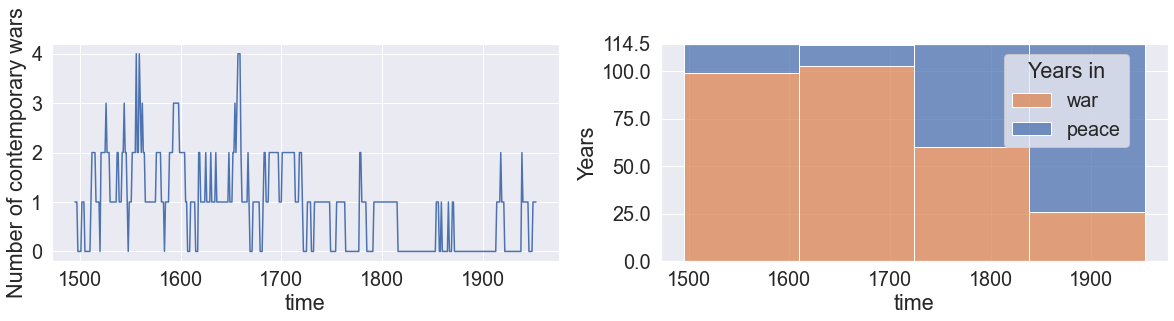

In [5]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style("darkgrid")
sns.set(font_scale = 1.8)

############ LOADING DATABASE GREAT POWER WARS
inFile = "GreatPowerWarsCSV.csv"
df = pd.read_csv(inFile,index_col=0,sep=";")
df.describe()

df["duration"] = df["END"] - df["START"]

time = np.arange(df["START"].min(),df["END"].max()+1,1)
warFlag = np.zeros(len(time))
warFlag_number= np.zeros(len(time))

for j in range(0,len(df)):
    ind_War = np.where(np.logical_and(np.greater_equal(time,df['START'][j]),
                         np.less_equal(time,df['END'][j])))
    warFlag_number[ind_War]=warFlag_number[ind_War]+1
    warFlag[ind_War]=1
    
dict_war = {'time': time, 'Years_War': warFlag, 'number_wars': warFlag_number}
df = pd.DataFrame(data=dict_war)

fig,ax = plt.subplots(1,2,figsize=(20,4))
#plt.figure(figsize=(10,10))
sns.lineplot(x="time", y="number_wars",data=df,ax=ax[0])
ax[0].set_ylabel("Number of contemporary wars")

x_min = int(df["time"].min())#minimum value
x_max = int(df["time"].max())#Maximum value
numYears = 100
range_bin_num = int(np.floor((x_max-x_min)/numYears))#num binf corresponding to numYears years
width_bin = (df.time.max()-df.time.min())/4

x = df.time
y = df.Years_War
sns.histplot(df, x="time",hue="Years_War",multiple="stack",bins=range_bin_num,ax=ax[1])
#ax=sns.displot(df, x="time",hue="Years_War",multiple="stack",bins=range_bin_num,
#              kind="hist",  linewidth=2,legend=False,height=6,aspect=1.2)
ax[1].set_ylabel("Years")
ax[1].set_ylim([0, width_bin])
ax[1].set_yticks(np.append(np.arange(0, width_bin, 25),width_bin))
plt.legend(title='Years in', loc='upper center', 
    bbox_to_anchor=(.8, 1.),
    ncol=1, 
    labels=['war', 'peace'])

There is – and there was - no long peace: the idea of a long peace was suggested by the fact that there were no direct wars between great powers in the second half of XX century. The same arguments used for explaining the long peace - especially the first two previously reported - can be used to highlight the importance of indirect wars between great powers (i.e. proxy wars). Proxy wars are highly related to both nuclear fear and spread of democracy; in fact, these wars usually involve non-nuclear states supported by (nuclear) great powers which usually use the spread of democracy as a justification for starting the conflicts. 

Instead of long peace it looks more appropriate to talk about *forbidden peace*. From the end of WWI until present, the number of contemporary proxy wars deeply increased (Fig.2 left) with a fast acceleration at the beginning of Cold War; after the dissolution of USSR, the number of contemporary proxy wars decreased of about a half of the peak reached around 1980. Moreover, from 1927 until now, the world has not seen a single year without a (proxy) war; the forbidden peace can be defined as the condition for which Great Powers fight each other using  proxy wars for all the available time. This leads the long peace to be unfounded; in the same way, the total war is empirically rejected since you can always find a state which is not in a war condition. Instead, the forbidden peace is empirically evident for the XX century: Fig. 2 right shows that not a single year of peace existed in XX century, not even nowadays. The peace is *de facto* forbidden by the proxy wars; a global peace is not achievable since a huge amount of states is involved in indipendent conflicts ruled by the great powers. Such a process is not fully deterministic, meaning that the Great Powers do not act as having as main purpose to avoid the global peace; nevertheless, it is one of the consequences of their decisions. The global peace is practically impossible in such conditions: a local war looks like a symptom of a larger war condition involving great powers which are not explicitly in war but that act under abeyance by proxy.

Text(0, 0.5, 'Years')

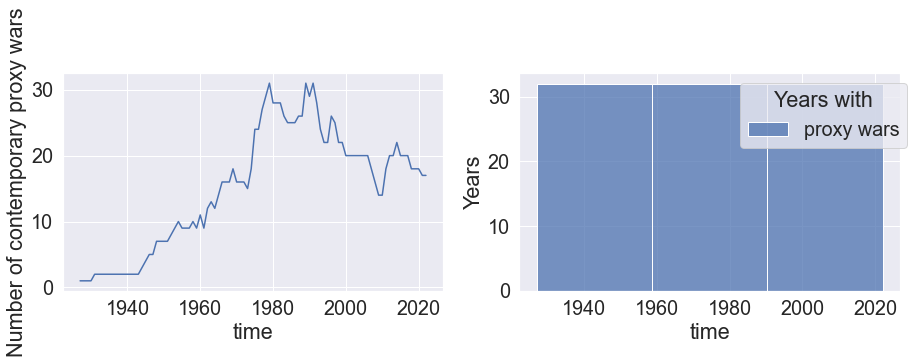

In [6]:

## PROXY WARS
inFile = "proxyWarsCSV.csv"
df_proxy = pd.read_csv(inFile,index_col=0,sep=";")
df_proxy.describe()

df_proxy['END'].replace('present', 2022,inplace=True)
df_proxy['END']=df_proxy['END'].astype(np.int64)

df_proxy["duration"] = df_proxy["END"] - df_proxy["START"]

time_proxy = np.arange(df_proxy["START"].min(),df_proxy["END"].max()+1,1)
warFlag_proxy = np.zeros(len(time_proxy))
warFlag_number_proxy= np.zeros(len(time_proxy))

for j in range(0,len(df_proxy)):
    ind_War = np.where(np.logical_and(np.greater_equal(time_proxy,df_proxy['START'][j]),
                         np.less_equal(time_proxy,df_proxy['END'][j])))
    warFlag_number_proxy[ind_War]=warFlag_number_proxy[ind_War]+1
    warFlag_proxy[ind_War]=1

## new database   
dict_war_proxy = {'time': time_proxy, 'War_condition': warFlag_proxy,
                  'number_wars': warFlag_number_proxy}
df_proxy_2 = pd.DataFrame(data=dict_war_proxy)

fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.lineplot(x="time", y="number_wars",data=df_proxy_2,ax=ax[0])
ax[0].set_ylabel("Number of contemporary proxy wars")

x_min = int(df_proxy_2["time"].min())#minimum value
x_max = int(df_proxy_2["time"].max())#Maximum value
numYears = 25
range_bin_num = int(np.floor((x_max-x_min)/numYears))#num binf corresponding to numYears years
sns.histplot(df_proxy_2, x="time",hue="War_condition",multiple="stack",bins=range_bin_num,ax=ax[1])
#sns.displot(df_proxy_2, x="time",hue="Years_War",multiple="stack",bins=range_bin_num,
#              kind="hist",  linewidth=2,legend=False,height=6,aspect=1.2)
ax[1].legend(title='Years with', loc='upper center', bbox_to_anchor=(.8, 1.), ncol=1, labels=['proxy wars'])
ax[1].set_ylabel("Years")


Proxy wars involve almost all the countries in the world as represented in the two following world maps. In the first, countries are colored in function of the number of hosted proxy wars; in the second, the colors are related to the average years of proxy wars in the whole considered period (1927-2022).

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu May 26 13:44:36 2022

@author: abate
"""
from urllib.request import urlopen
import json
# with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
#     counties = json.load(response)
with urlopen('https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json') as response:
    counties = json.load(response)

counties["features"][0]

import pandas as pd
import numpy as np
# df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
#                    dtype={"fips": str})
# df["fips"]=0
# df.insert(2, 'region', 'AFG')
# df.head()
inFile = "proxyWarsGeoCSV.csv"
df_proxy = pd.read_csv(inFile,index_col=0,sep=";")
df_proxy.describe()

df_proxy['END'].replace('present', 2022,inplace=True)
df_proxy['END']=df_proxy['END'].astype(np.int64)

df_proxy["duration"] = df_proxy["END"] - df_proxy["START"]

df = df_proxy[['Country','duration','START']]
#adf = df.query('START>=1927')
df_years_war=df.groupby("Country")["duration"].mean().reset_index(name ='Avg_Years_war')

df_num_wars=df.groupby("Country")["START"].count().reset_index(name ='Num_wars')
#df.groupby('Country')['duration'].transform('sum').unstack()

# plot
import plotly.express as px
import plotly.io as pio
#pio.renderers.default = 'svg'
pio.renderers.default = 'browser'

fig = px.choropleth_mapbox(df_num_wars, geojson=counties, locations='Country', color='Num_wars',
                           color_continuous_scale="Viridis",
                           range_color=(0, df_num_wars.Num_wars.max()),
                           mapbox_style="carto-positron",
                           zoom=1, center = {"lat": 40, "lon": -1},
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

fig = px.choropleth_mapbox(df_years_war, geojson=counties, locations='Country', color='Avg_Years_war',
                           color_continuous_scale="Viridis",
                           range_color=(0, df_years_war.Avg_Years_war.max()),
                           mapbox_style="carto-positron",
                           zoom=1, center = {"lat": 40, "lon": -1},
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


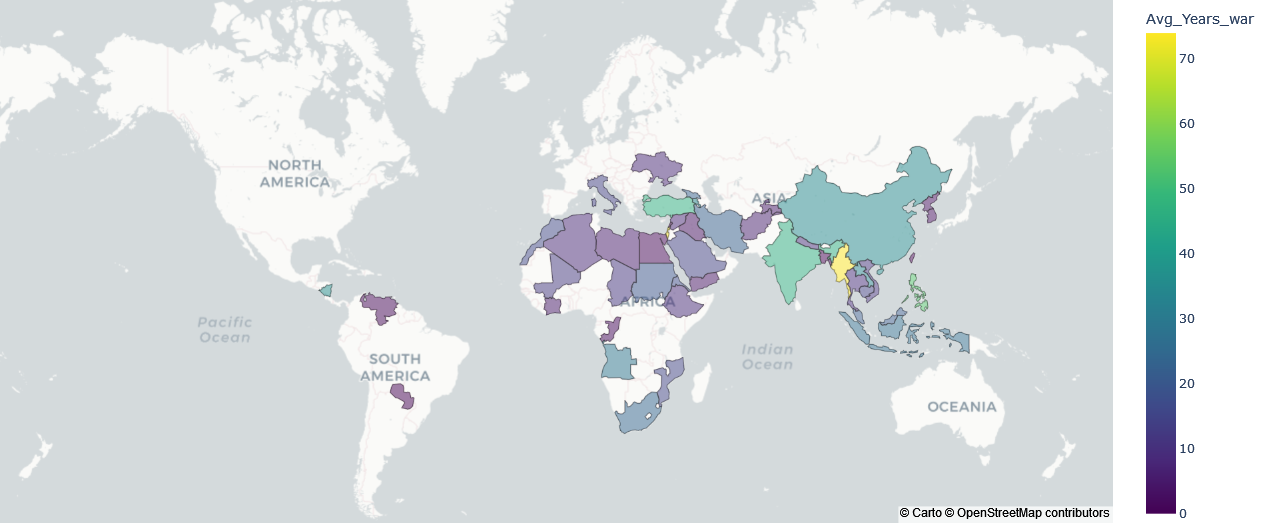


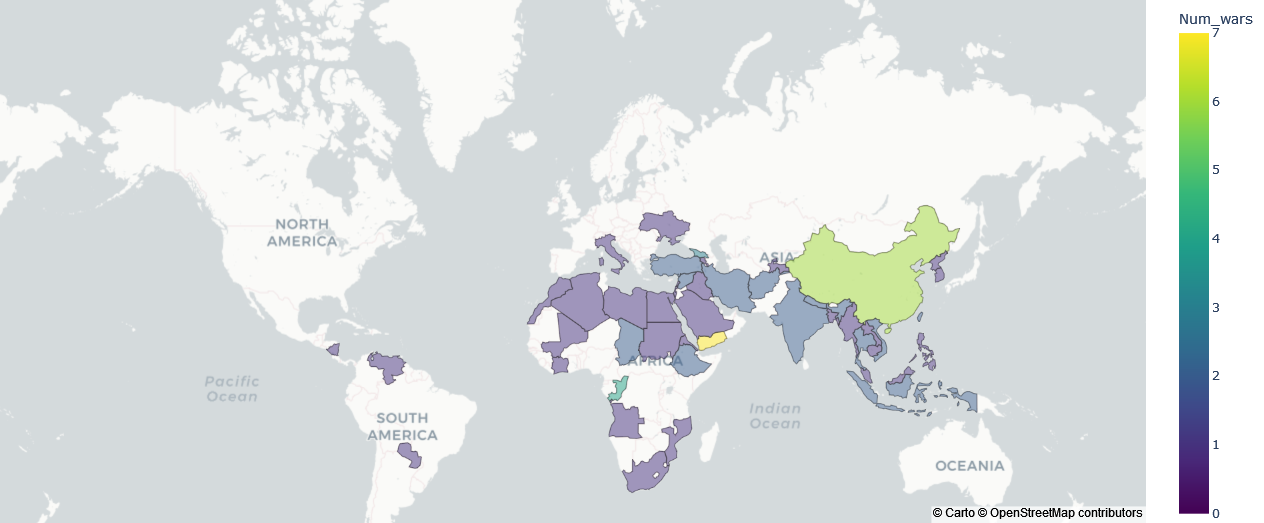